1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Epoch 0, Discriminator Loss: 0.8085, Accuracy: 0.3125, Best Generator Loss: 0.6968
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━

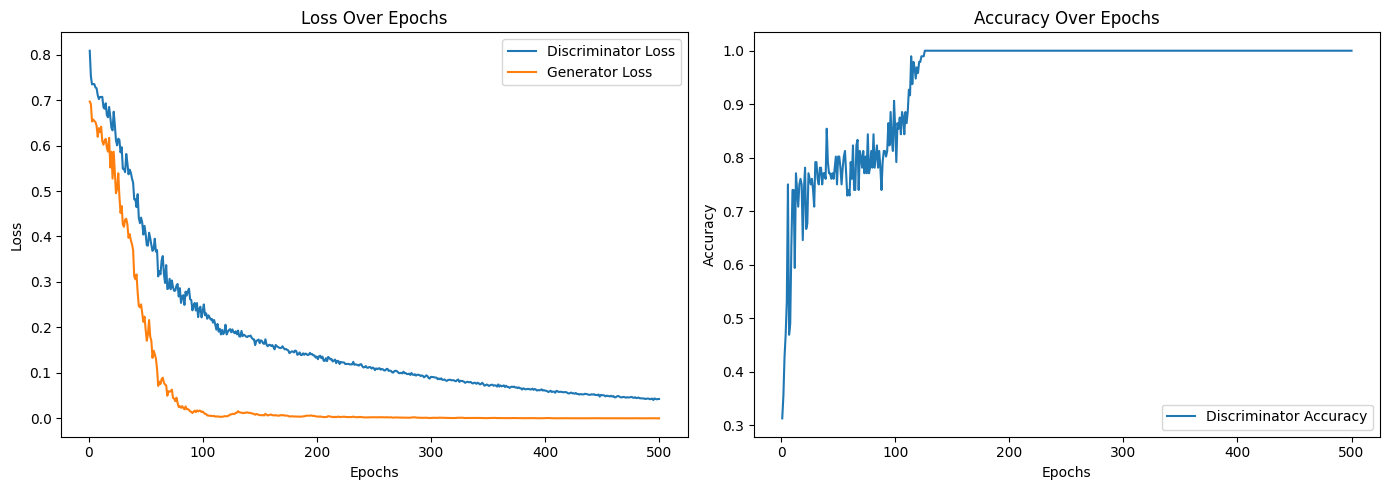

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Simple random data generator (points on a line)
def create_real_data(batch_size=32):
    X_real = np.random.uniform(-1, 1, (batch_size, 1))
    y_real = 2 * X_real + 1
    return X_real, y_real

# Generator Model
def build_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(8, input_dim=1, activation='relu'))  # Reduced neurons
    model.add(layers.Dense(1))
    return model

# Discriminator Model
def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(8, input_dim=1, activation='relu'))  # Reduced neurons
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Track accuracy
    return model

# Genetic Algorithm to mutate the generator's weights
def mutate_weights(weights, mutation_rate=0.05):  # Reduced mutation rate
    new_weights = []
    for w in weights:
        mutation = np.random.randn(*w.shape) * mutation_rate
        new_weights.append(w + mutation)
    return new_weights

# Training function with reduced complexity and memory-efficient design
def train_gan(epochs=500, pop_size=5, mutation_rate=0.05, batch_size=32):
    # Build generator and discriminator
    generator = build_generator()
    discriminator = build_discriminator()

    # Lists to store loss and accuracy over time
    d_loss_history = []
    d_acc_history = []
    g_loss_history = []

    for epoch in range(epochs):
        # Generate real data on-the-fly for each batch
        X_real, y_real = create_real_data(batch_size)

        # Train discriminator on real and fake data
        X_fake = generator.predict(X_real)
        X_combined = np.vstack((y_real, X_fake))
        y_combined = np.hstack((np.ones((batch_size,)), np.zeros((batch_size,))))

        d_loss, d_acc = discriminator.train_on_batch(X_combined, y_combined)

        # Genetic Algorithm optimization for the generator
        best_loss = float('inf')
        best_weights = generator.get_weights()

        for _ in range(pop_size):
            # Mutate generator weights
            new_weights = mutate_weights(generator.get_weights(), mutation_rate)
            generator.set_weights(new_weights)

            # Generate fake data with new weights
            X_fake = generator.predict(X_real)
            y_fake_labels = np.zeros((batch_size,))

            # Evaluate discriminator's performance on fake data
            d_loss_on_fakes = discriminator.evaluate(X_fake, y_fake_labels, verbose=0)[0]  # Extract loss

            # Select the best performing mutation
            if d_loss_on_fakes < best_loss:
                best_loss = d_loss_on_fakes
                best_weights = new_weights

        # Update generator with the best weights found during mutation
        generator.set_weights(best_weights)

        # Track losses and accuracy
        d_loss_history.append(d_loss)
        d_acc_history.append(d_acc)
        g_loss_history.append(best_loss)

        # Logging at certain intervals
        if epoch % 50 == 0:
            print(f'Epoch {epoch}, Discriminator Loss: {d_loss:.4f}, Accuracy: {d_acc:.4f}, Best Generator Loss: {best_loss:.4f}')

    # Return the histories for plotting
    return generator, discriminator, d_loss_history, d_acc_history, g_loss_history

# Run training with optimized GAN
generator, discriminator, d_loss_history, d_acc_history, g_loss_history = train_gan(epochs=500, pop_size=5, mutation_rate=0.05, batch_size=32)

# Visualizing the accuracy and loss over epochs
def plot_metrics(d_loss_history, d_acc_history, g_loss_history):
    epochs = range(1, len(d_loss_history) + 1)

    # Plot Discriminator Loss
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, d_loss_history, label='Discriminator Loss')
    plt.plot(epochs, g_loss_history, label='Generator Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Discriminator Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, d_acc_history, label='Discriminator Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the metrics
plot_metrics(d_loss_history, d_acc_history, g_loss_history)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 0, Discriminator Loss: 0.6538, Accuracy: 0.4219, Best Generator Loss: 0.7029
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━

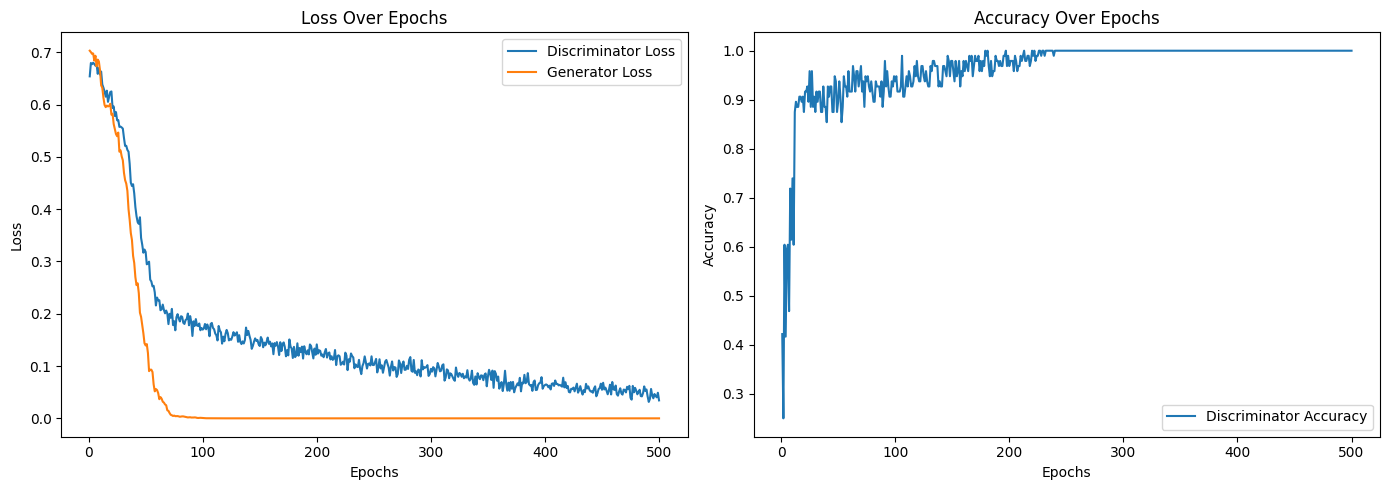

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step

Test X (real): [-0.05009435 -0.98365062  0.47989369  0.91553291  0.6132283 ]
Generated Y: [-332.4455  -332.73495 -334.86148 -336.84735 -335.4693 ]


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Simple random data generator (points on a line)
def create_real_data(batch_size=32):
    X_real = np.random.uniform(-1, 1, (batch_size, 1))
    y_real = 2 * X_real + 1
    return X_real, y_real

# Generator Model
def build_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(8, input_dim=1, activation='relu'))  # Reduced neurons
    model.add(layers.Dense(1))
    return model

# Discriminator Model
def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(8, input_dim=1, activation='relu'))  # Reduced neurons
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Track accuracy
    return model

# Genetic Algorithm to mutate the generator's weights
def mutate_weights(weights, mutation_rate=0.05):  # Reduced mutation rate
    new_weights = []
    for w in weights:
        mutation = np.random.randn(*w.shape) * mutation_rate
        new_weights.append(w + mutation)
    return new_weights

# Training function with reduced complexity and memory-efficient design
def train_gan(epochs=500, pop_size=5, mutation_rate=0.05, batch_size=32):
    # Build generator and discriminator
    generator = build_generator()
    discriminator = build_discriminator()

    # Lists to store loss and accuracy over time
    d_loss_history = []
    d_acc_history = []
    g_loss_history = []

    for epoch in range(epochs):
        # Generate real data on-the-fly for each batch
        X_real, y_real = create_real_data(batch_size)

        # Train discriminator on real and fake data
        X_fake = generator.predict(X_real)
        X_combined = np.vstack((y_real, X_fake))
        y_combined = np.hstack((np.ones((batch_size,)), np.zeros((batch_size,))))

        d_loss, d_acc = discriminator.train_on_batch(X_combined, y_combined)

        # Genetic Algorithm optimization for the generator
        best_loss = float('inf')
        best_weights = generator.get_weights()

        for _ in range(pop_size):
            # Mutate generator weights
            new_weights = mutate_weights(generator.get_weights(), mutation_rate)
            generator.set_weights(new_weights)

            # Generate fake data with new weights
            X_fake = generator.predict(X_real)
            y_fake_labels = np.zeros((batch_size,))

            # Evaluate discriminator's performance on fake data
            d_loss_on_fakes = discriminator.evaluate(X_fake, y_fake_labels, verbose=0)[0]  # Extract loss

            # Select the best performing mutation
            if d_loss_on_fakes < best_loss:
                best_loss = d_loss_on_fakes
                best_weights = new_weights

        # Update generator with the best weights found during mutation
        generator.set_weights(best_weights)

        # Track losses and accuracy
        d_loss_history.append(d_loss)
        d_acc_history.append(d_acc)
        g_loss_history.append(best_loss)

        # Logging at certain intervals
        if epoch % 50 == 0:
            print(f'Epoch {epoch}, Discriminator Loss: {d_loss:.4f}, Accuracy: {d_acc:.4f}, Best Generator Loss: {best_loss:.4f}')

    # Return the histories and final generator for testing
    return generator, discriminator, d_loss_history, d_acc_history, g_loss_history

# Run training with optimized GAN
generator, discriminator, d_loss_history, d_acc_history, g_loss_history = train_gan(epochs=500, pop_size=5, mutation_rate=0.05, batch_size=32)

# Visualizing the accuracy and loss over epochs
def plot_metrics(d_loss_history, d_acc_history, g_loss_history):
    epochs = range(1, len(d_loss_history) + 1)

    # Plot Discriminator Loss
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, d_loss_history, label='Discriminator Loss')
    plt.plot(epochs, g_loss_history, label='Generator Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Discriminator Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, d_acc_history, label='Discriminator Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the metrics
plot_metrics(d_loss_history, d_acc_history, g_loss_history)

# Testing the generator after training
def test_generator(generator):
    # Generate test data
    test_X_real, test_y_real = create_real_data(batch_size=5)
    generated_y = generator.predict(test_X_real)

    # Print real and generated values
    print("\nTest X (real):", test_X_real.flatten())
    print("Generated Y:", generated_y.flatten())

# Test the generator and print outputs
test_generator(generator)
